# TP 3: Support Vector Machines (SVM) & kernel methods

In this tutorial we will try to predict the species of a penguin from its physical characteristics using support vector machines (SVM).

For this we will use the *palmerpenguins* dataset, an alternative to the now classic *iris* of scikit-learn. It contains the characteristics of three species of penguins found on the Palmer Archipelago, off the northwest coast of the Antarctic Peninsula.

Pour plus d'informations, vous pouvez allez voir le site: https://allisonhorst.github.io/palmerpenguins/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas

## I- Importing data

### 1) with pip
To install the package to access the data: **pip install palmerpenguins**

In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()

### 2) in csv format
If you do not have *pip* and cannot download the package in any other way, you have the data in .csv format in moodle.

In [5]:
import pandas as pd
palmerpenguins = pd.read_csv("palmerpenguins_data.csv")

## II- Dataset description 

In [6]:
palmerpenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
import collections
print(palmerpenguins.shape)
print(collections.Counter(palmerpenguins.species))

(344, 8)
Counter({'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68})


**344** penguins with **8** attributes:
- *species*: Adelie (152 penguins), Gentoo (124 penguins) and Ginstrap (68 penguins)
- *island* (the census island): Biscoe, Dream and Torgersen
- *bill_length_mm*: length of the bill in mm
- *bil_depth_mm*: width of the bill in mm
- *flipper_length_mm*: width of flippers in mm
- *body_mass_g*: weight in g
- *sex*: male and female
- *year*: year of census

### Missing values

In [8]:
palmerpenguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

You notice that there are some observations for which information is missing. This is called **missing values**. 
Here we decide to ignore these observations. This leaves us with 342 labels to predict.

In [9]:
palmerpenguins = palmerpenguins[palmerpenguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index()
palmerpenguins.shape

(342, 9)

Instead of ignoring incomplete observations, a solution which is often better (from the point of view of the performance of data-driven decision models) is to **estimate** (or **impute**) the missing data and treat the estimated values as measured values.  

For this we could have used the *SimpleImputer* function of *sklearn.impute*. For more information, you can go to the site: https://scikit-learn.org/stable/modules/impute.html#impute

### Features

For the rest of the tutorial, we will only be interested in the numerical features *bill_depth_mm*, *bill_length_mm*, *flipper_length_mm* and *body_mass_g*.

In [10]:
penguins_features = palmerpenguins[["bill_length_mm", "bill_depth_mm","body_mass_g", "flipper_length_mm"]]

### Labels

We will try to predict the species, which correspond to the attribute **species** but in integer form. It will then be easier to handle the species as integers than as characters.

In [11]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
print(species_names)

['Adelie' 'Chinstrap' 'Gentoo']


In [12]:
penguins_labels = pd.DataFrame(palmerpenguins["species"])
penguins_labels["species_int"] = species_int

In [13]:
penguins_labels

,species,species_int
0,Adelie,0
1,Adelie,0
2,Adelie,0
3,Adelie,0
4,Adelie,0
...,...,...
337,Chinstrap,1
338,Chinstrap,1
339,Chinstrap,1
340,Chinstrap,1


## III- SVM with a linear kernel

### 1. Standard case

For the time being, we will limit ourselves to **two species (labels)**. : **Adelie (0)** adn **Gentoo (2)**; and **two features** : *body_mass_g* et *bill_length_mm*.
 
We will train a **linear SVM**.
we will use the [SVC] class (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from the *svm* module of scikit-learn.

In [14]:
from sklearn import svm

In [15]:
# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["body_mass_g", "bill_length_mm"]])
# data = np.array(data[["body_mass_g", "flipper_length_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's display the performance of the predictor:

In [16]:
print(clf.score(data, labels))

0.9452554744525548


### Q1

__Question :__ Which performance measure is calculated by [`clf.score`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score) ?

__Answer :__

### 2. Feature standardisation

Let's standardise the features (by removing their mean and dividing by their standard deviation) and see if this has an influence on the performance of the SVM. This task is fully automated by `scikit-learn` :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [17]:
from sklearn import preprocessing

# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
#data = np.array(data[["body_mass_g", "bill_length_mm"]])
data = np.array(data[["body_mass_g", "flipper_length_mm"]])

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])

# initialize a model
clf = svm.SVC(kernel='linear', C=1)

# fit the model
clf.fit(X= data_scaled, y = labels)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's represent the separating hyperplane!

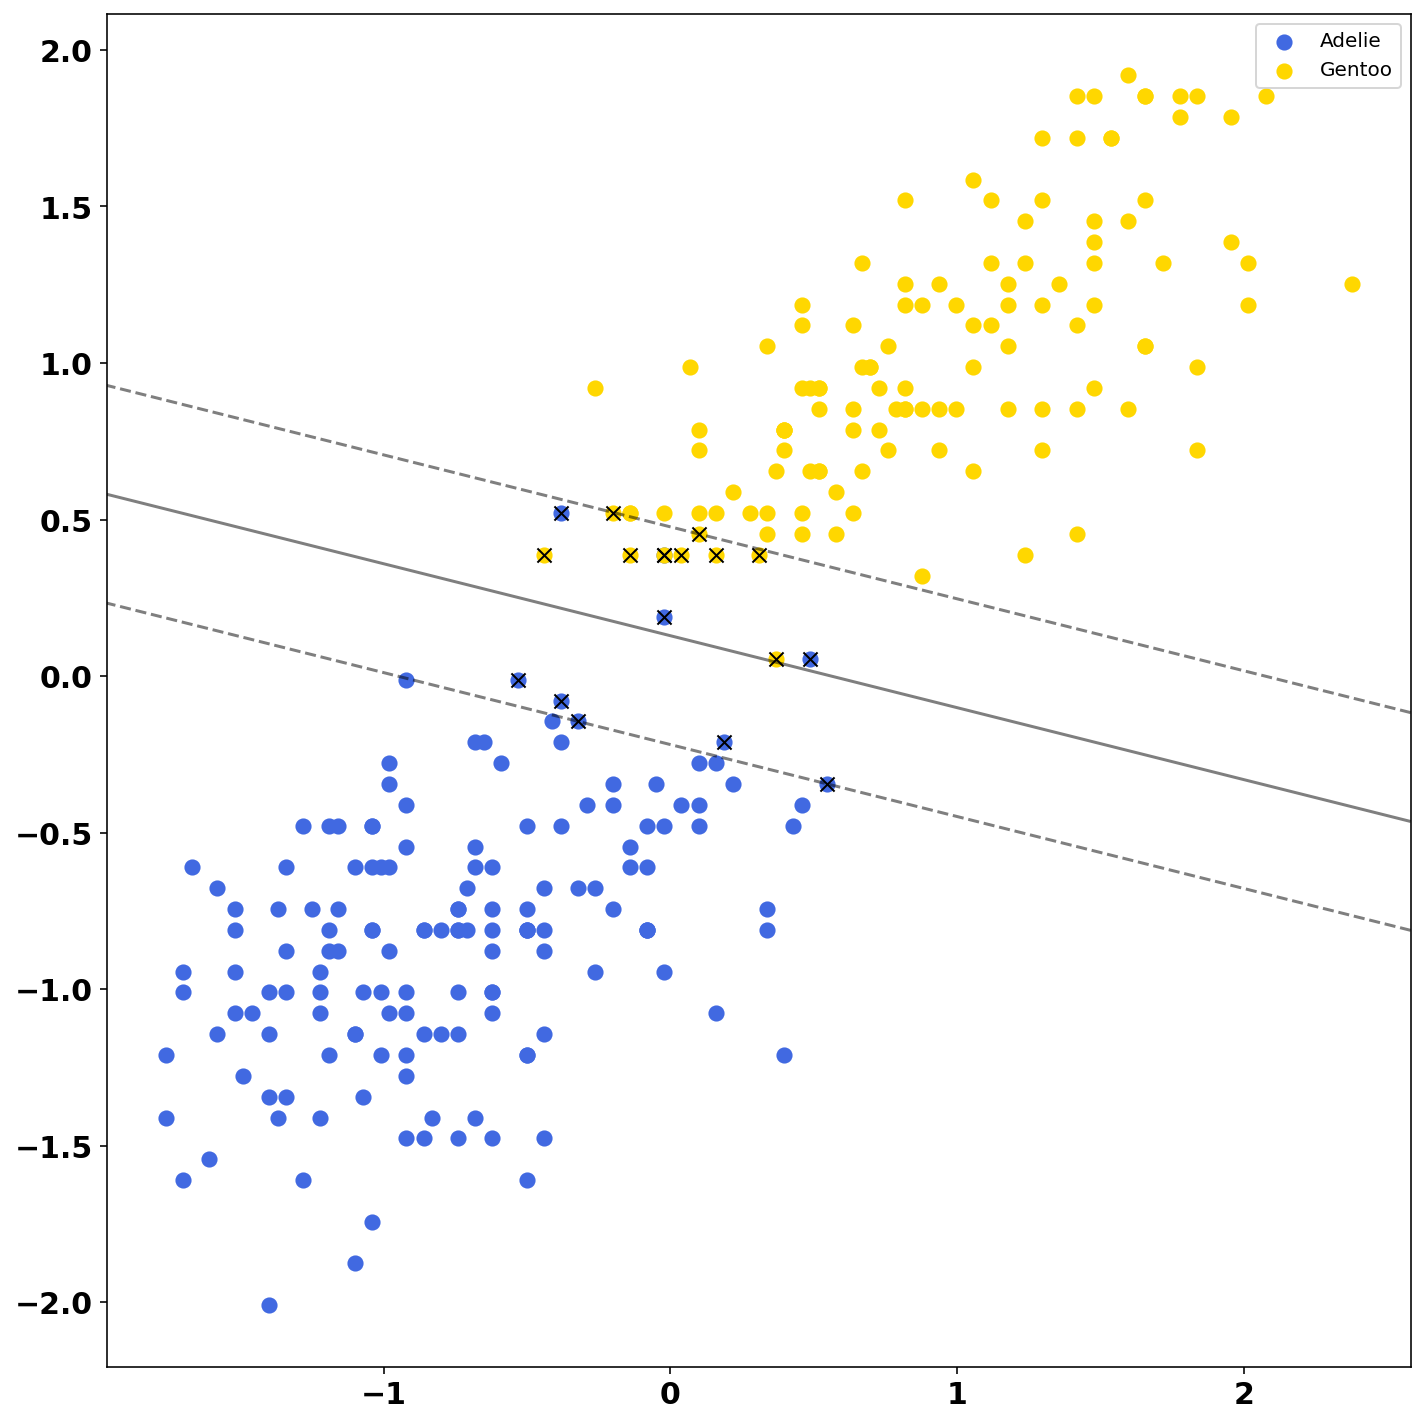

In [18]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==0),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==0),1], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==2),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==2),1], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

In [19]:
print(clf.score(data_scaled, labels))

0.9854014598540146


### Q2.

__Question :__ What is the effect of feature standardisation on the performance of the classifier? How can you interpret it?

__Answer :__ 

For the rest of the tutorial, we will therefore standardise all the features.

In [20]:
std_scale = preprocessing.StandardScaler().fit(penguins_features)
penguins_features_scaled = pd.DataFrame(std_scale.transform(penguins_features), columns=penguins_features.columns)

### 3. Perfect case

This time we will look at the features **bill_length_mm** and **bill_depth_mm**.

In [21]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["bill_length_mm","bill_depth_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10000)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

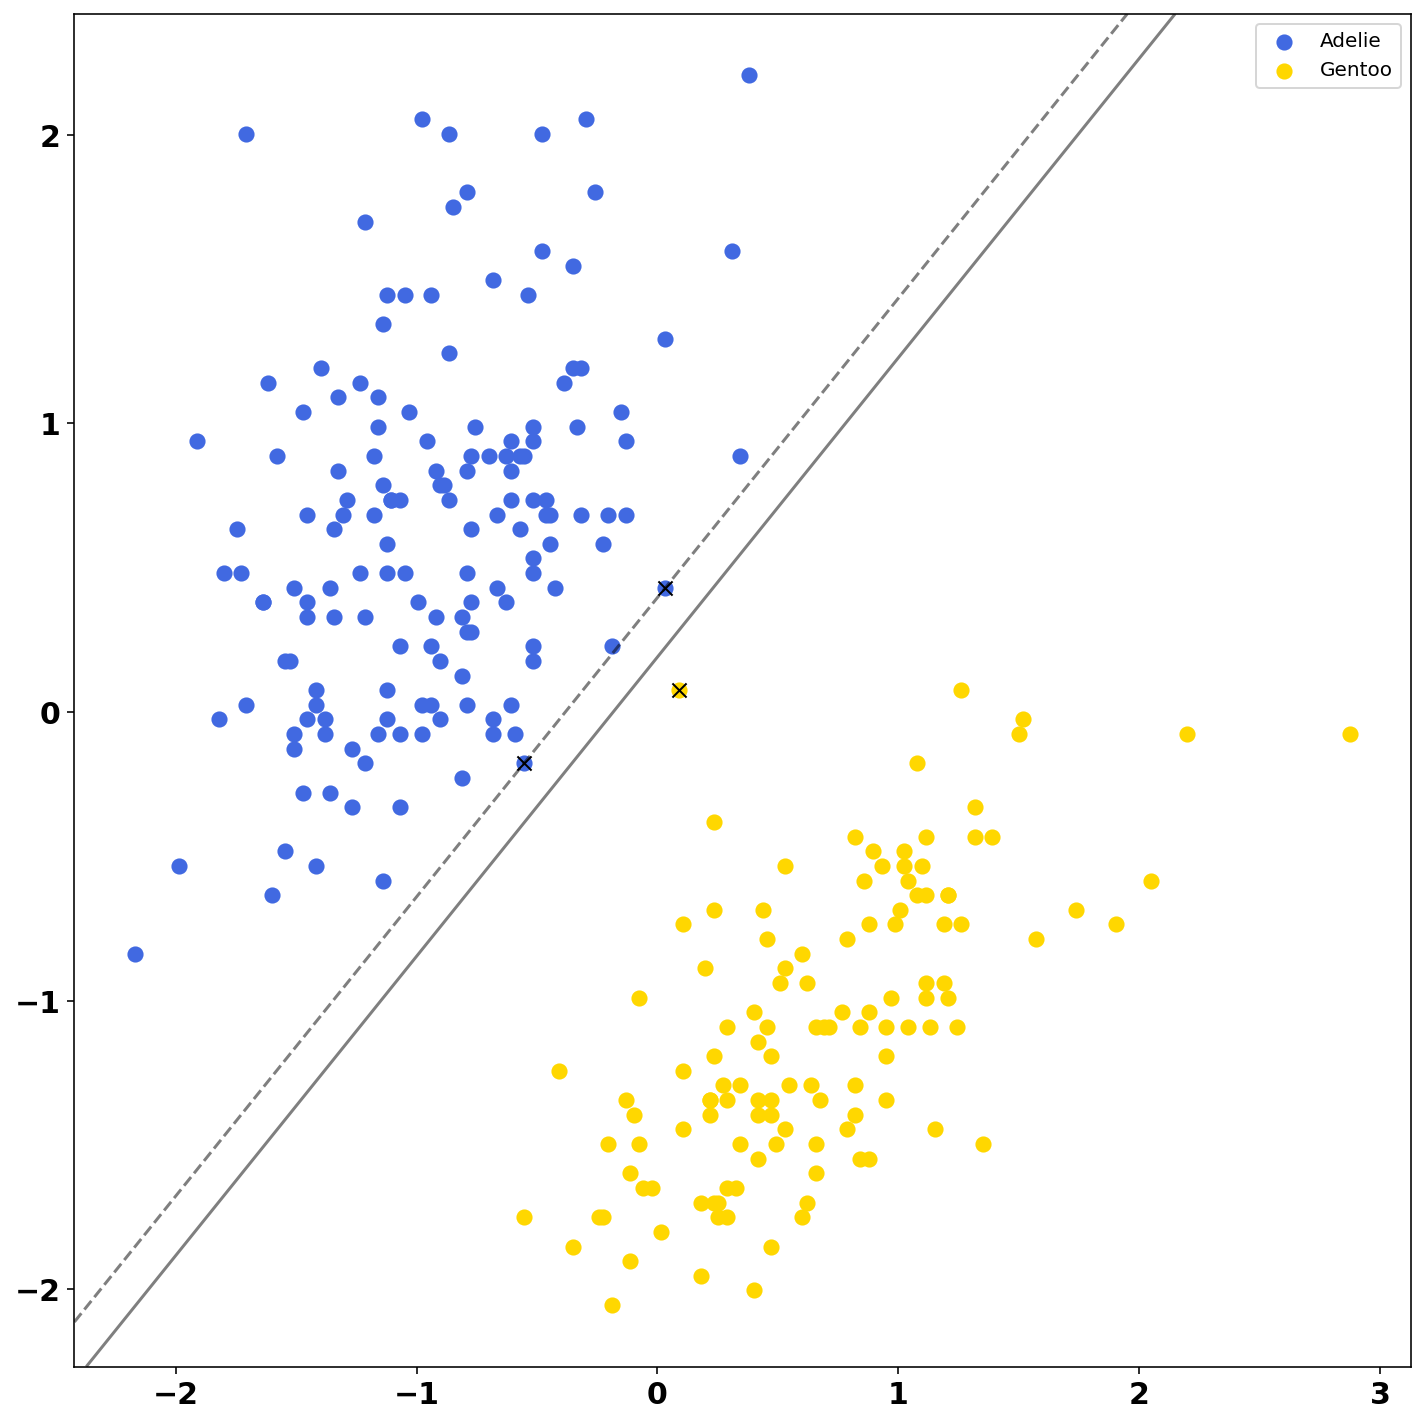

In [22]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_length_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==2]['bill_length_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==2]['bill_depth_mm'], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0], 
           alpha=0.5, linestyles=['--', '-'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### Q3.

__Question :__ What does a performance of 1.0 mean? Which points are the support vectors? 

__Answer :__ 

### 4. Gram matrix representation

The **kernel** can be interpreted as a similarity matrix between different observations. We then rely on the similarity of some observations to be able to classify them. 

We will represent the Gram matrix from the previous classifier. In the case of a linear kernel SVM, it corresponds to the scalar product of the features. In order to give you a good feeling of the **similarity** between the observations, ther Gram matrix will be reduced to a matrix with 1s on the diagonal using the *center_an_normalise_kernel()* function.

In [23]:
import math

def center_and_normalise_kernel(K_temp):

    K_temp = preprocessing.KernelCenterer().fit_transform(K_temp)
    nb_item = K_temp.shape[0]
    K_norm = np.zeros((nb_item, nb_item))
    for i in range(nb_item):
        for j in range(i, nb_item):
            K_norm[i, j] = K_temp[i, j] / math.sqrt(K_temp[i, i] * K_temp[j, j])
            K_norm[j, i] = K_norm[i, j]

    return K_norm

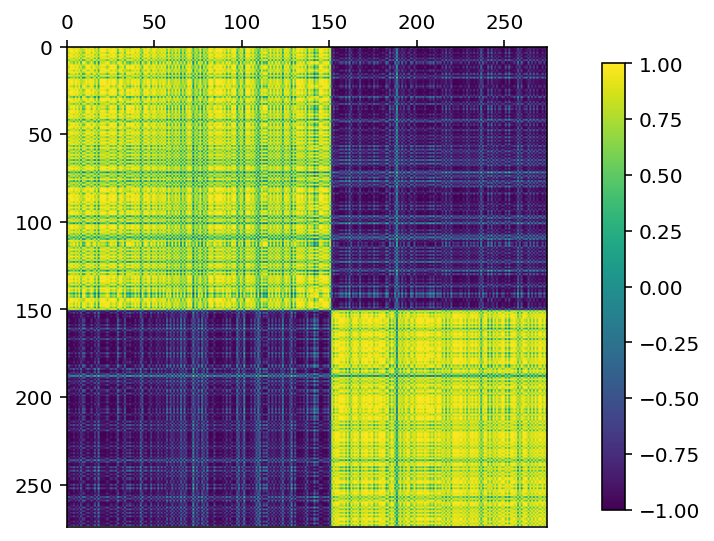

In [24]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q4.a

__Question:__ What do you notice? Could you have anticipated that the classifier "separates" well by looking at the Gram matrix?

__Answer:__ 

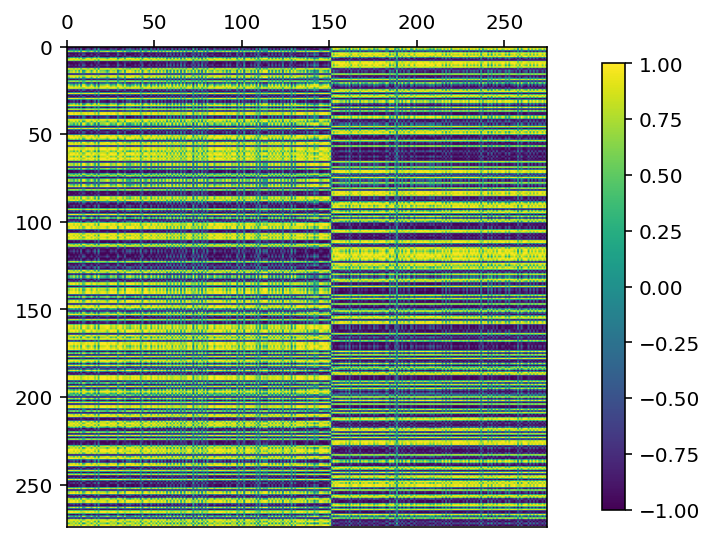

In [25]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

r = GramMatrix.shape[0]
pr = np.random.permutation(np.arange(r))


# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled[pr,:]) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q4.b

__Question:__ What do you observe? What should we look out for when we observe a Gram matrix?

__Réponse:__ 

### 5. A slightly more complicated case

Now consider the two species: **Adelie (0)** and **Chinstrap (1)** and the features *body_mass_g* and *bill_depth_mm*.

In [26]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "body_mass_g"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10)

# fit the model
clf.fit(X= data, y = labels)

X shape: (219, 2)
y shape: (219,)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

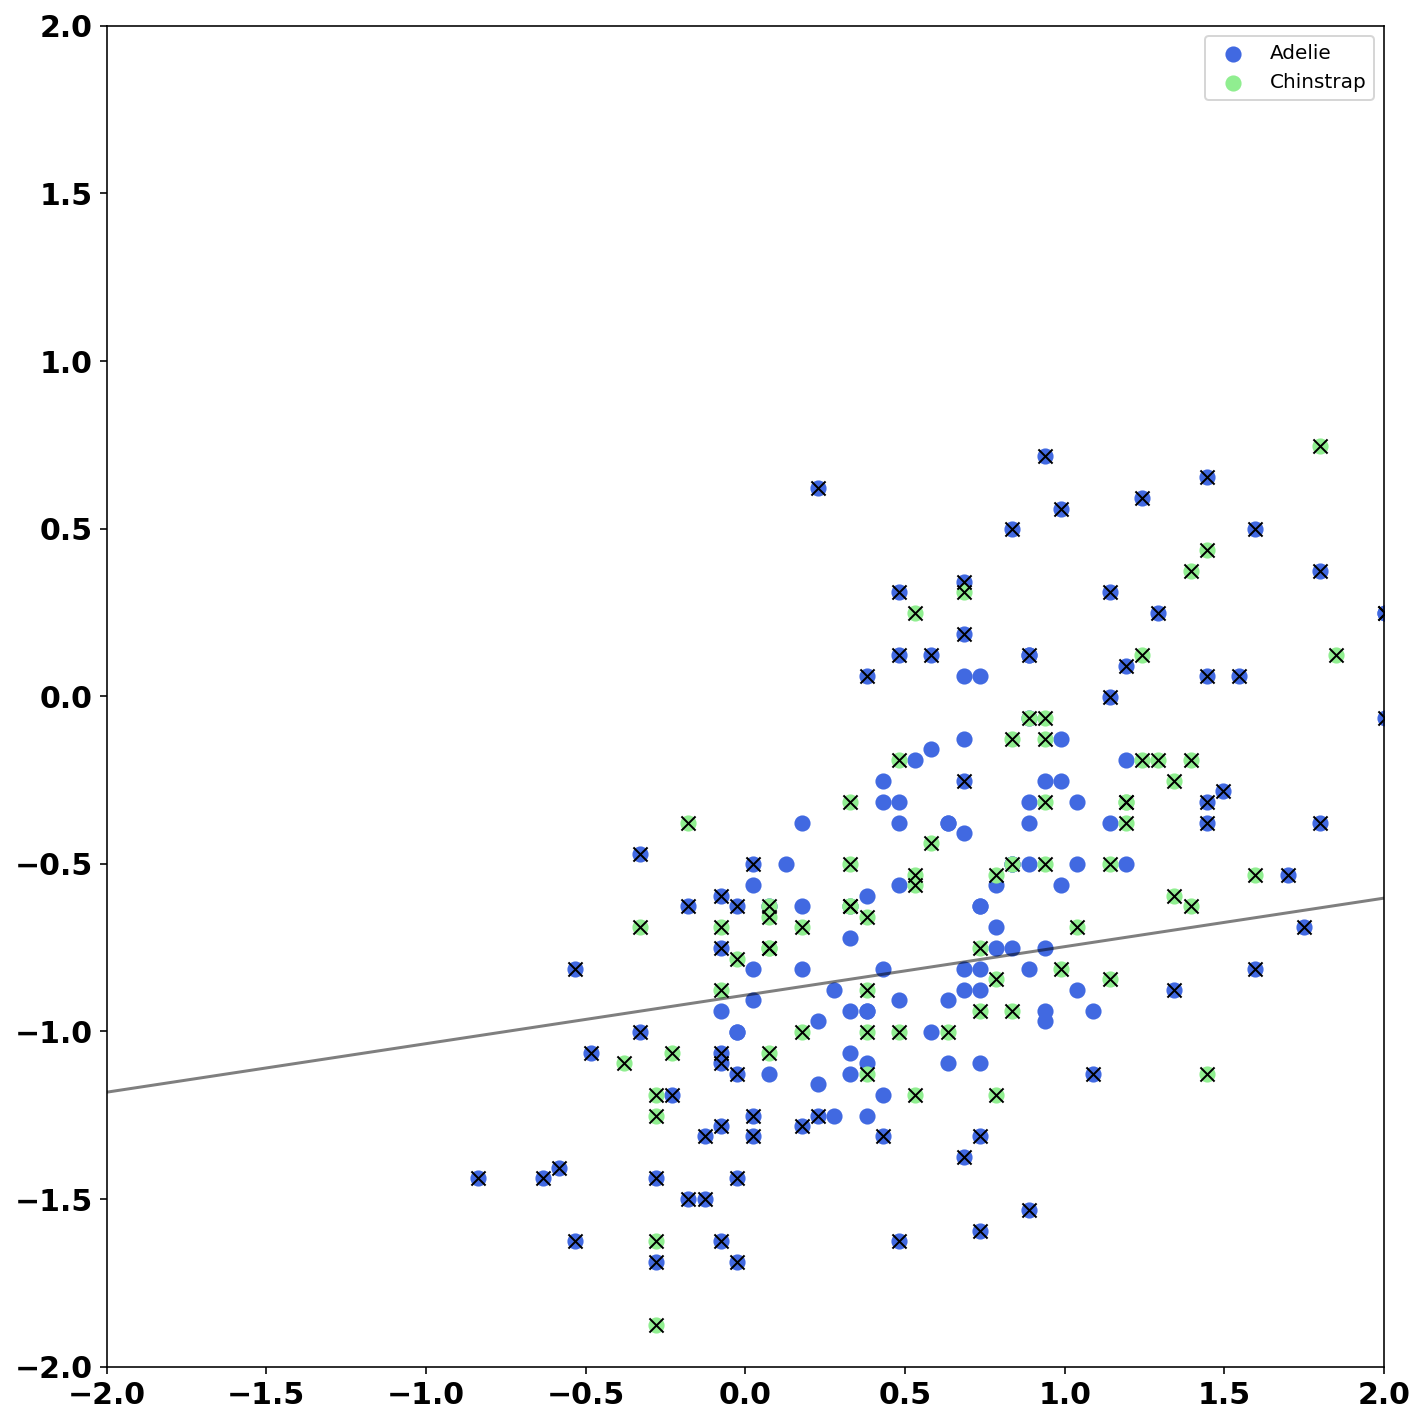

In [27]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['body_mass_g'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==1]['bill_depth_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==1]['body_mass_g'], 
                    color="lightgreen", 
                    s=50, 
                    label = 'Chinstrap',
                    cmap=plt.cm.Paired)



plt.legend()

# get frame limits
ax = plt.gca()

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, 
           alpha=0.5, linestyles=[ '-',])


# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

With graphics, it is really not easy to separate the two species with a line.

In [28]:
print(clf.score(data, labels))

0.6894977168949772


### Q5.a

__Question:__ How well does this model perform? What does the algorithm predict?

__Answer:__

Let's represent the Gram matrix

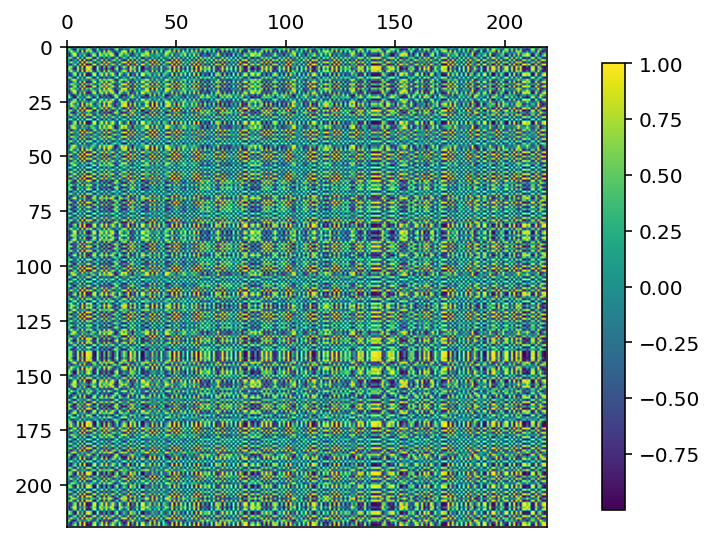

In [30]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q5.b

__Question :__ What do you observe?

__Answer :__

Maybe it would make more sense to look at other features to separates the two classes 0 and 1.

In [31]:
penguins_adelie_chinstrap = pd.concat([penguins_features[penguins_labels["species_int"].isin([0,1])],
                                    penguins_labels[penguins_labels["species_int"].isin([0,1])]],
                                     axis = 1)

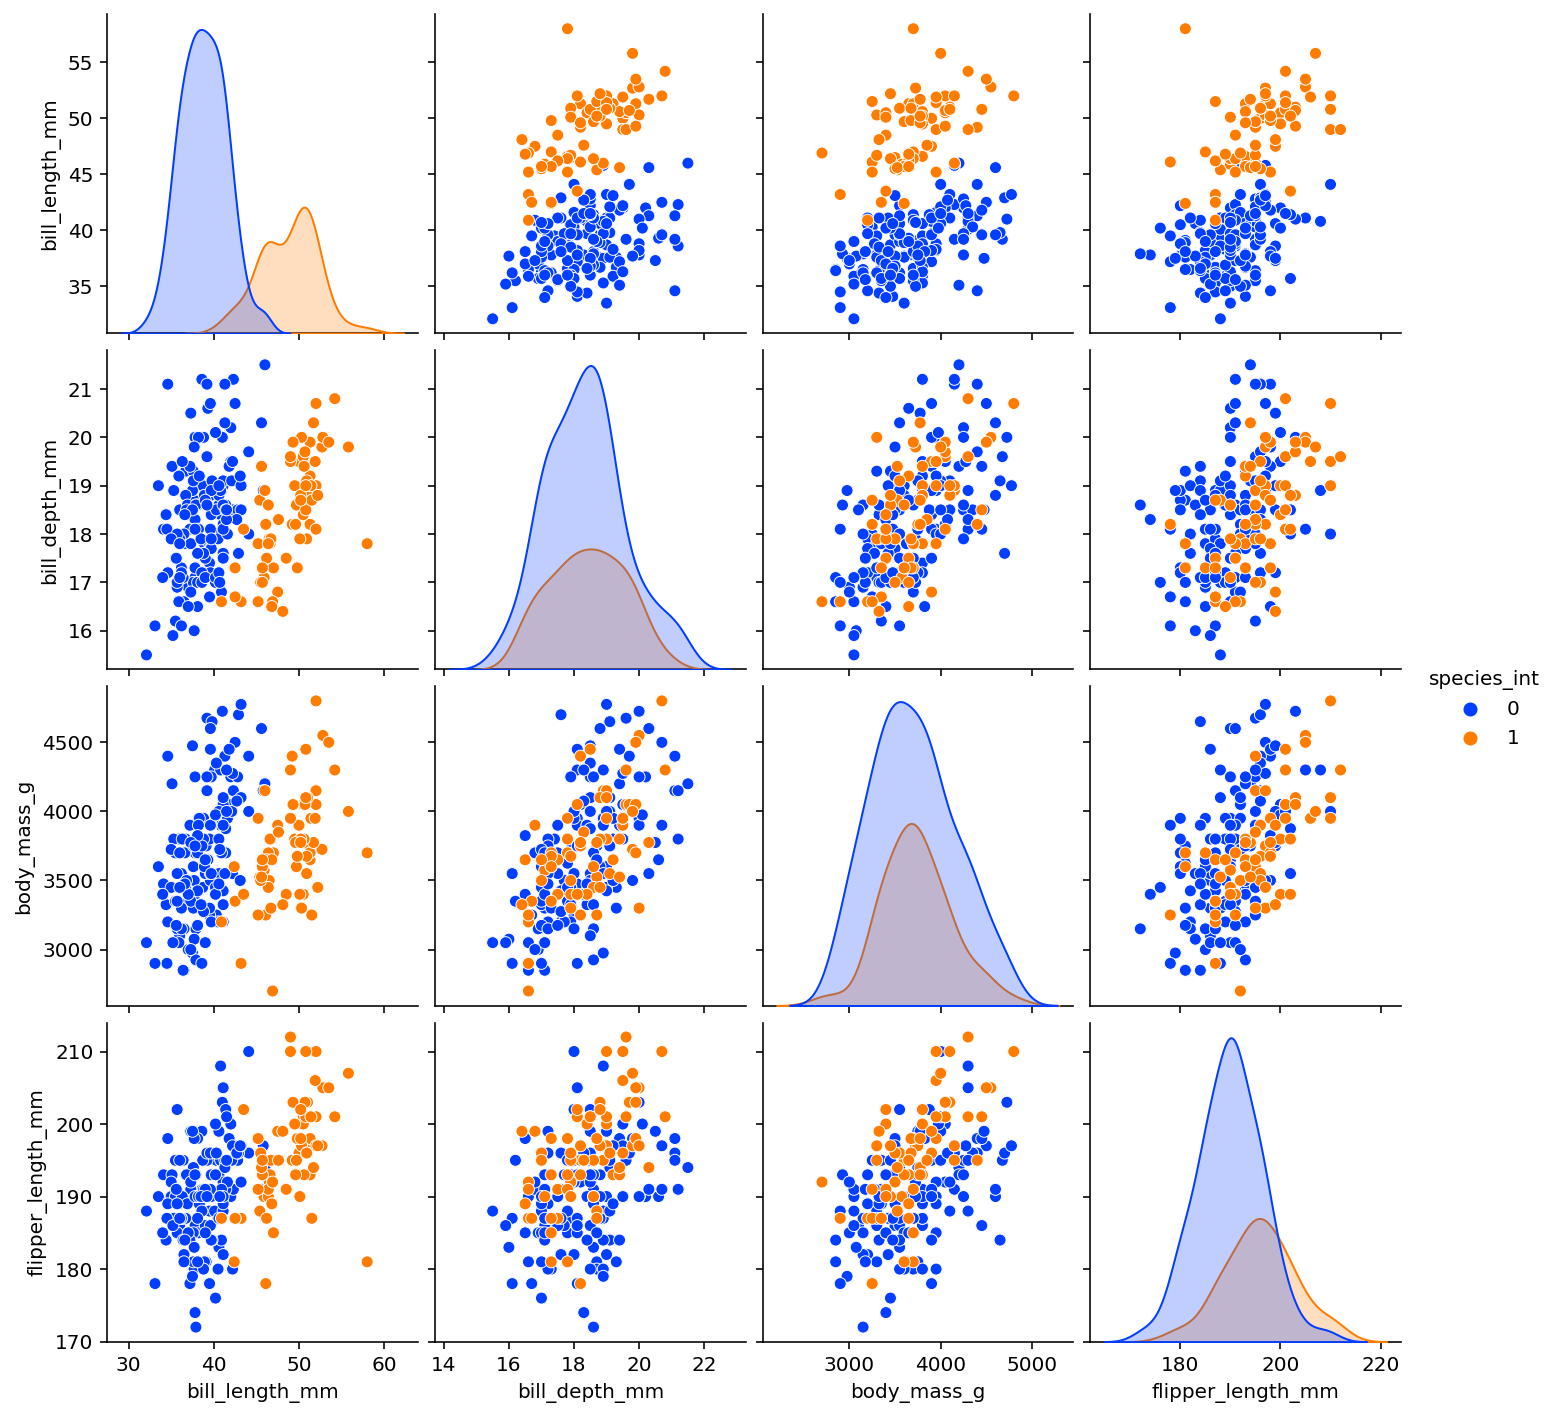

In [32]:
import seaborn as sns
sns.pairplot(penguins_adelie_chinstrap, hue="species_int",palette="bright")

### Q5.c

__Question :__
Quel(s) couple(s) de variables pourrait-on utiliser pour avoir une meilleure séparation de ces deux classes ? 

__Réponse :__

Refaites les étapes du III.5. pour ce couple de variable

In [ ]:
# Réponse

## IV. SVM à noyau non linéaire

### 1. Noyau RBF

Nous allons utiliser un **noyau RBF** ou **radial gaussien**, pour plusieurs valeurs du paramètre gamma. En classe nous avons donné la formule du noyau gaussien :

\begin{align}
k(x, x') = \exp\bigg[-\frac{||x - x'||^2}{2 \sigma^2}\bigg]
\end{align}

Une autre définition implique le paramètre gamma, $\gamma=\frac{1}{2 \sigma^{2}}$ : 

\begin{align}
k(x,x')=\exp\bigg[(-\gamma\||x - x'||^2\bigg]
\end{align}

### Q6.

__Question :__ À quoi correspond le paramètre gamma dans la formule du noyau gaussien ?

__Réponse :__

Testons différentes valeurs de gamma.

In [ ]:
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "bill_length_mm"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

# gamma values
gamma_range = np.linspace(0.01, 200, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.7, gamma=param)
    clf.fit(data, labels)
    score = clf.score(data, labels)
    print("gamma: {0:.2f} | score: {1:.2f}".format(param, score))

### Q7.

__Question :__ Quelle valeur de gamma serions-nous tenter de prendre pour avoir un meilleur modèle?

__Réponse :__

### 2. Généralisation

Est-ce que ce modèle se __généralise__ bien, autrement dit, sera-t-il capable de faire de bonnes prédictions sur de nouvelles données que nous n'avons pas utilisées pour le construire ? 

Pour le savoir, nous allons séparer les données en un __jeu d'entraînement__ et un __jeu de test__. Nous allons entraîner nos SVMs sur le jeu d'entraînement seulement, et mesurer leur performance sur le jeu de test. Le jeu de test, étant inconnu au moment de l'entraînement, fait figure de nouvelles données. Pour cela nous allons utiliser la fonction [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn.

Nous devons faire le split sur les variables non standardisées, standardiser le jeu de train, puis standardiser le jeu de test en fonction de la variance et de la moyenne des variables du jeu de train.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset between train and test
data = penguins_features[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "bill_length_mm"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [ ]:
# test the performance for different values of gamma
acc_train, acc_test = list(), list()
gamma_range = np.linspace(0.01, 200, 20)
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.7, gamma=param)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))

Représentons la performance en fonction des valeurs de Gamma testées

In [ ]:
plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### Q8.

__Question :__ Observez-vous un effet de surapprentissage ? Où ? 

__Réponse :__ 

Le graphique ci-dessus nous donne envie de prendre pour le paramètre gamma une valeur autour de 10. Mais attention ! Si nous prenons le paramètre qui marche le mieux sur le dataset de test, nous risquons aussi de surapprendre : nous aurons alors utilisé le jeu de test pour choisir le meilleur modèle, autrement dit, nous aurons touché aux données smoi-disant inconnuees lors de l'apprentissage...

Pour éviter cela, nous devons faire une __validation croisée__ (_cross-validation_) sur le jeu d'entraînement.

Regardons les performances en faisant varier les paramètres *gamma* et *C*.
Nous allons pour cela utiliser la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) du module model_selection de scikit-learn.

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# define a set of parameter to test
parameters = {'gamma':[ 1, 10, 20, 50], 
             'C':[0.5, 0.7,1]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

In [ ]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 3.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

### Q9.

__Question :__ Quel est le rôle du paramètre C ? Qu'observez-vous quand C est grand ? 

__Réponse :__

### Q10.

__Question :__ Finalement, quelles valeurs de C et gamma allez vous prendre ?

__Réponse :__ 

## Mise en pratique

Sélectionnons les meilleurs paramètres de SVM pour la classification avec les 4 variables (*bill_depth_mm*,  *bill_length_mm*, *flipper_length_mm* et *body_mass_g*).

__Question :__ Entraînez un SVM de classification pour séparer les données sur les deux problèmes (Adélie vs Gentoo, puis Adélie vs Chinstrap). Entraînez votre SVM en validation croisée sur le jeu d'entraînement. Quels paramètres pouvez-vous faire varier ? Quelle est la performance de votre modèle optimal _sur le jeu de test_ ? 

### 1) Adélie (0) vs Gentoo (2)

In [ ]:
# Réponse

### 2) Adélie (0) vs Chinstrap (1)

On reproduit la même chose pour ces classes.

In [ ]:
# Réponse

### Question bonus

__Question :__ Comment construiriez-vous un modèle multi-classe, à base de SVMs, qui assigne une nouvelle observation à une des trois espèces Adélie (0), Chinstrap (1) ou Gentoo (2)?

__Réponse :__